# Assignment 3 - Building a Custom Visualization

---
## 1.0 Introduction

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

## 2.0 Synopsis

I: 

- called '%matplotlib notebook' and 'mpl.get_backend()' to set the environment to render the graph later.
- imported modules used later
- called 'np.random.seed(12345)' to ensure the random numbers later produced are reproducible.
- created a dataframe. Each row represents a year of a series of random normal generated numbers
- found the mean, standard error measure, confindence interval for each year/row
- created a mechanism so if a user input value (y_test), then a bar colors blue if it is **probably** below the input, red if is **probably** above the input, and white if it is the same as the input.
- created the bar chart with a horizontal line.

## 3.0 Preprocessing

Here's the code to prepare the data.

<IPython.core.display.Javascript object>


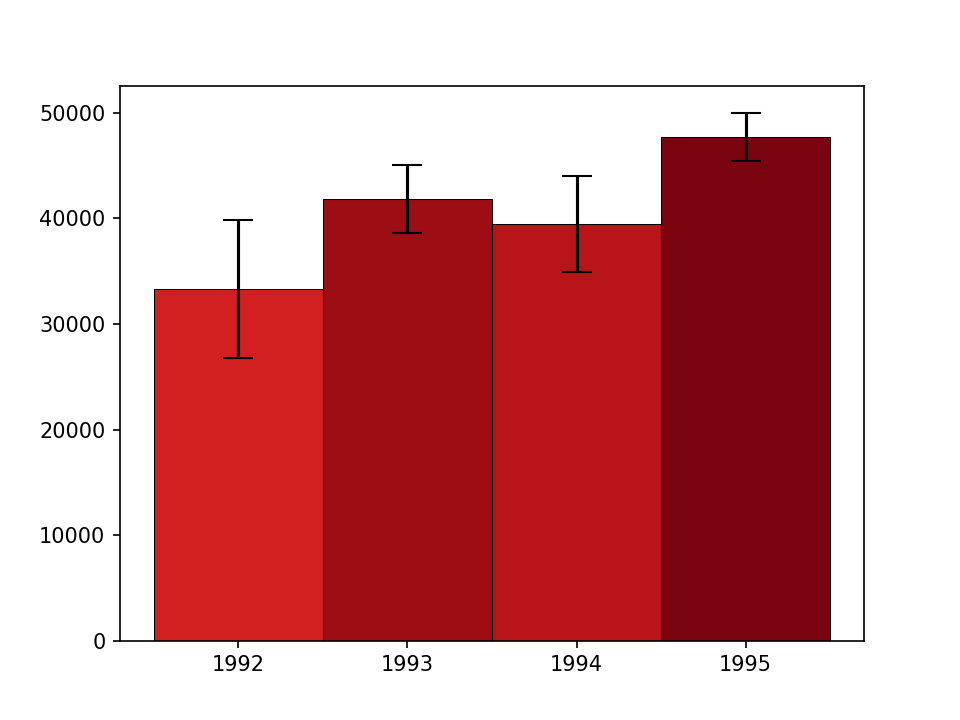

array([0.72649696, 0.89027132, 0.80532595, 0.95832423])

In [9]:
#step 1 - used a Ipython magic, i.e. a function and 'mpl.get_backend()' to set the environment to render the graph later
#also import modules which are used later

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import cm
from matplotlib.widgets import SpanSelector

mpl.get_backend()

#step 2 - set the seed to ensure the code is reproducible
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

#step 3 - find the mean for each row
means = df.mean(axis=1)

#step 4 - find the confidence interval for each row or year
yerr = df.sem(axis = 1) * norm.ppf(0.975)

#goal - test the given y-axis value of interest (e.g. 39941.52) 
#and then draw a horizontal line and color bars based on this value. 
#So bars might be colored red if they are definitely above this value (given the confidence interval), 
#blue if they are definitely below this value, or white if they contain this value.

#step 5 - test low max & min values

y_max = 10000
y_min =8000

#step 6 - find the cumulative probability that the actual mean for a population is below the defined 'y_test'. 
#So it will be 0.5 if the y_test is exactly the same as the mean, 
#near 1 if y-test is much lower, and near 0 if y-test is much lower.
#prob = st.norm.cdf((y_test - df.mean(axis=1))/(df.sem(axis = 1)))

prob = st.norm.cdf((y_max - df.mean(axis=1))/(df.sem(axis = 1))-(y_min - df.mean(axis=1))/(df.sem(axis = 1)))

#step 7 - use the matlpotlib cm module, and pick colour scale RdBu (which is white at the middle, and red and blue at each end)
bar_colour = cm.Reds(prob)

#step 5 - plot the bars with x-axis as years, y-axis as the mean, and put confidence intervals using yerr
#and used tick_label to get the x-axis to have nice non-decimal years and only years for the bars for 1992, 1993, 1994, and 1995
#adjust the line width
#capsize makes horizontal lines for confidence intervals


fig, ax = plt.subplots(1)
ax.bar(df.index,  means,width = 1, yerr=yerr, linewidth=0.5, color=bar_colour, tick_label =df.index, 
        edgecolor='black', capsize=7)

#line = ax.axhline(y_test,  xmin=0, c='k', clip_on=False)
#https://www.coursera.org/learn/python-plotting/discussions/weeks/3/threads/IumZbSJNEee6ugr9raNa5A

# initialise lines and texts
'''
line1 = ax.axhline(y=50000, c='k', lw=.5)
text1 = ax.text(1992, 50000-2500, 'Y=' + str(50000),horizontalalignment='center',
               bbox={'facecolor': 'gray', 'alpha': 0.5, 'pad': 2},)

line2 = ax.axhline(y=10000, c='k', lw=.5)
text2 = ax.text(1992, 10000 - 2500, 'Y =' + str(10000),horizontalalignment='center',
                bbox={'facecolor': 'gray', 'alpha': 0.5, 'pad': 2},)


def onselect(vmin, vmax):
    # repostion lines and text when a range is selected
    text1.set_text('Y = {:.2f}'.format(vmax))
    text1.set_position((1992, vmax - 2500))
    line1.set_data([0, 1], [vmax] * 2)

    text2.set_text('Y = {:.2f}'.format(vmin))
    text2.set_position((1992, vmin - 2500))
    line2.set_data([0, 1], [vmin] * 2)

'''


#span = SpanSelector(ax, onselect, 'vertical')
prob

In [4]:
def square(x):
    return x * x


import unittest

class TestNotebook(unittest.TestCase):

    def test_square(self):
        self.assertEqual(square(2), 4)


unittest.main(argv=[''], verbosity=2, exit=False) 



test_square (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.015s

OK


In [18]:
range(0,2)

[0, 1]